In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from kmeans import KMeans

Load and inspect the iris dataset.

In [2]:
fname = Path("datasets/iris.data")
data = np.loadtxt(fname, delimiter=",",
    dtype={
        "names": ("sepal_length", "sepal_width", "petal_length", "petal_width", "class"),
        "formats": (np.float64, np.float64, np.float64, np.float64, "object")
    })

In [3]:
data[:20]

array([(5.1, 3.5, 1.4, 0.2, 'Iris-setosa'),
       (4.9, 3. , 1.4, 0.2, 'Iris-setosa'),
       (4.7, 3.2, 1.3, 0.2, 'Iris-setosa'),
       (4.6, 3.1, 1.5, 0.2, 'Iris-setosa'),
       (5. , 3.6, 1.4, 0.2, 'Iris-setosa'),
       (5.4, 3.9, 1.7, 0.4, 'Iris-setosa'),
       (4.6, 3.4, 1.4, 0.3, 'Iris-setosa'),
       (5. , 3.4, 1.5, 0.2, 'Iris-setosa'),
       (4.4, 2.9, 1.4, 0.2, 'Iris-setosa'),
       (4.9, 3.1, 1.5, 0.1, 'Iris-setosa'),
       (5.4, 3.7, 1.5, 0.2, 'Iris-setosa'),
       (4.8, 3.4, 1.6, 0.2, 'Iris-setosa'),
       (4.8, 3. , 1.4, 0.1, 'Iris-setosa'),
       (4.3, 3. , 1.1, 0.1, 'Iris-setosa'),
       (5.8, 4. , 1.2, 0.2, 'Iris-setosa'),
       (5.7, 4.4, 1.5, 0.4, 'Iris-setosa'),
       (5.4, 3.9, 1.3, 0.4, 'Iris-setosa'),
       (5.1, 3.5, 1.4, 0.3, 'Iris-setosa'),
       (5.7, 3.8, 1.7, 0.3, 'Iris-setosa'),
       (5.1, 3.8, 1.5, 0.3, 'Iris-setosa')],
      dtype=[('sepal_length', '<f8'), ('sepal_width', '<f8'), ('petal_length', '<f8'), ('petal_width', '<f8'), ('class'

In [4]:
classes = np.unique(data["class"])
classes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
len(data)

150

Preprocessing: Split data into a training and a validation set. Select features. Normalize the data.

In [6]:
rng = np.random.default_rng()
rng.shuffle(data)

training = data[:-30]
validation = data[-30:]

In [7]:
def normalize(x):
    return (x - np.mean(x)) / np.std(x)

In [8]:

xlabel = "petal_length"
ylabel = "petal_width"
huelabel = "class"

In [9]:
x_data = normalize(training[xlabel])
y_data = normalize(training[ylabel])
class_data = training[huelabel]

In [10]:
x_val = normalize(validation[xlabel])
y_val = normalize(validation[ylabel])
class_val = validation[huelabel]

Analysis: Make scatterplot. Guess initial means. Run the kmeans algorithm.

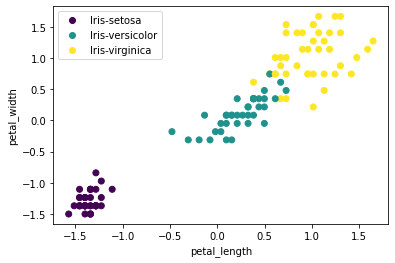

In [11]:

fig, ax = plt.subplots()
sc = ax.scatter(x_data, y_data, c=[np.where(classes==x)[0][0] for x in class_data])
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
legend = ax.legend(sc.legend_elements(prop="colors")[0], classes)

In [12]:
# Guess initial means
means = [(-1.5, -1), (0, 0), (1.5, 1.5)]

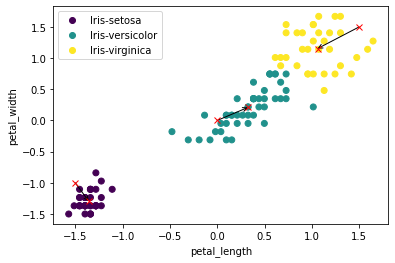

In [13]:
km = KMeans(x_data, y_data, means=means, labels=(xlabel, ylabel), legend_labels=classes)
km.show_step() #1


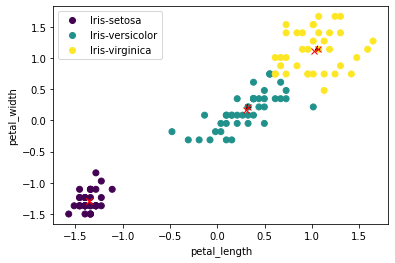

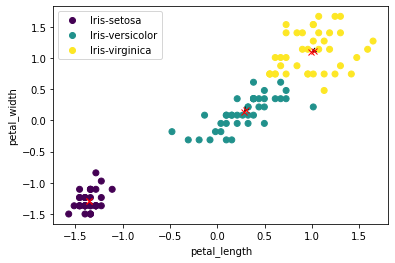

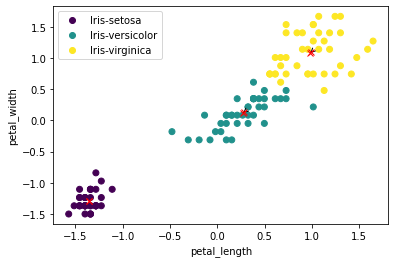

In [14]:
km.show_step() #2
km.show_step() #3
km.show_step() #4

In [22]:
hits = sum(
    cls == km.predict(x, y)[0]
    for x, y, cls in zip(x_val, y_val, class_val))
hits / len(x_val)

0.9333333333333333